# YouTube Trending Video Analysis

This Jupyter Notebook is part of the project that aims to analyze metadata of trending YouTube videos from 113 countries. The goal is to build a machine learning model to predict the likelihood of a video becoming trending based on its metadata.

## Project Setup

### Import Necessary Libraries
Here we import the libraries necessary for data handling, analysis, and visualization.

In [ ]:
!pip install "portalocker[redis]"
!pip install lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 70.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Deep learning libraries (example)
import tensorflow as tf
from tensorflow import keras

# Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Visualization settings
sns.set(style="whitegrid")

## Load the Dataset
Load the dataset from the CSV file.

In [ ]:
file_path = '/content/data/trending_yt_videos_113_countries.csv'

import csv

def read_complex_csv(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        headers = next(reader)  # Extract the header row
        rows = [row for row in reader]
    return headers, rows

# Read the CSV file
headers, rows = read_complex_csv(file_path)

# Convert to DataFrame
data = pd.DataFrame(rows, columns=headers)
# extract all the english language entries
data = data[data["langauge"].astype('string').str.contains('en')]
data.head() # Show the DataFrame's head

,title,channel_name,daily_rank,daily_movement,weekly_movement,snapshot_date,country,view_count,like_count,comment_count,description,thumbnail_url,video_id,channel_id,video_tags,kind,publish_date,langauge
3,Garnacho UNBELIEVABLE Overhead Kick! 🤩 | Evert...,Manchester United,4,0,46,2023-11-30,ZW,7152047,160601,5760,United picked up 3️⃣ points at Goodison Park o...,https://i.ytimg.com/vi/qgmhQZzoy1s/mqdefault.jpg,qgmhQZzoy1s,UC6yW44UGJJBvYTlfC7CRg2Q,"manchester united, mufc, man utd, manutd, mu, ...",youtube#video,2023-11-26 00:00:00+00:00,en-GB
4,Drake - First Person Shooter ft. J. Cole,DrakeVEVO,5,0,-3,2023-11-30,ZW,19835341,867885,36707,Listen to For All The Dogs Scary Hours Edition...,https://i.ytimg.com/vi/Xty2gi5cMa8/mqdefault.jpg,Xty2gi5cMa8,UCQznUf1SjfDqx65hX3zRDiA,"Drake, First, Person, Shooter, OVO/Republic, H...",youtube#video,2023-11-15 00:00:00+00:00,en
8,PREMIER LEAGUE HIGHLIGHTS: EVERTON 0-3 MANCHES...,Everton Football Club,9,-1,41,2023-11-30,ZW,1673822,15626,487,Two-minute highlights from Everton’s Premier L...,https://i.ytimg.com/vi/SPn-f8mWeUs/mqdefault.jpg,SPn-f8mWeUs,UCtK4QAczAN2mt2ow_jlGinQ,"Everton;, Everton, Football, Club;, efc;, the,...",youtube#video,2023-11-26 00:00:00+00:00,en-GB
9,Alexander-Arnold & Haaland Score in Thrilling ...,Liverpool FC,10,11,40,2023-11-30,ZW,2261773,38559,1057,Watch highlights from the Etihad Stadium as th...,https://i.ytimg.com/vi/Om5e3S7tU2s/mqdefault.jpg,Om5e3S7tU2s,UC9LQwHZoucFT94I2h6JOcjw,"Liverpool FC, LFC, Liverpool, Anfield, Melwood...",youtube#video,2023-11-25 00:00:00+00:00,en-GB
13,MATCH HIGHLIGHTS | Tottenham Hotspur 1-2 Aston...,Aston Villa Football Club,14,-2,36,2023-11-30,ZW,813536,13052,305,#astonvilla seal the points in North London ag...,https://i.ytimg.com/vi/YhQVPONG7q0/mqdefault.jpg,YhQVPONG7q0,UCICNP0mvtr0prFwGUQIABfQ,"Aston Villa FC, Aston Villa Football Club, AVF...",youtube#video,2023-11-26 00:00:00+00:00,en-GB


# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical step in the data science workflow. It allows us to understand the structure, distribution, and relationships within our dataset. Through EDA, we aim to uncover patterns, spot anomalies, test hypotheses, and check assumptions with the help of statistical summaries and graphical representations.

In this section of the notebook, we will perform EDA on the YouTube Trending Video dataset.

## 1. Data Types and Missing Values
This helps in planning data preprocessing steps like imputation or removal.

In [ ]:
print("Data Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())

Data Types:
 title              object
channel_name       object
daily_rank         object
daily_movement     object
weekly_movement    object
snapshot_date      object
country            object
view_count         object
like_count         object
comment_count      object
description        object
thumbnail_url      object
video_id           object
channel_id         object
video_tags         object
kind               object
publish_date       object
langauge           object
dtype: object

Missing Values:
 title              0
channel_name       0
daily_rank         0
daily_movement     0
weekly_movement    0
snapshot_date      0
country            0
view_count         0
like_count         0
comment_count      0
description        0
thumbnail_url      0
video_id           0
channel_id         0
video_tags         0
kind               0
publish_date       0
langauge           0
dtype: int64


## 2. Statistical Summary of Numerical Columns

Provides insights into the data's scale and distribution.

In [ ]:
print("\nStatistical Summary:\n", data.describe())


Statistical Summary:
                                            title channel_name daily_rank daily_movement weekly_movement snapshot_date country view_count like_count comment_count description                                     thumbnail_url     video_id                channel_id video_tags           kind               publish_date langauge
count                                      58158        58158      58158          58158           58158         58158   58158      58158      58158         58158       58158                                             58158        58158                     58158      58158          58158                      58158    58158
unique                                      4000         1954         50             99              99            36     113      18942      34344          8715        3510                                              3938         3938                      1952       2474              1                        519        7
to

## 3. Categorical Data Analysis

Since our dataset includes categorical data like country names and channel names, we'll explore these variables to understand their frequency distribution.

In [ ]:
print("\nValue Counts for 'country':\n", data['country'].value_counts())
print("\nValue Counts for 'channel_name':\n", data['channel_name'].value_counts())


Value Counts for 'country':
 NZ    1394
IS    1384
MT    1343
IE    1332
NO    1320
      ... 
LY     181
YE     177
TW     145
FR     139
JP     134
Name: country, Length: 113, dtype: int64

Value Counts for 'channel_name':
 MrBeast              2057
DaFuq!?Boom!         1190
Pink Shirt Couple     997
Mark Rober            962
Alan Chikin Chow      914
                     ... 
Rarran                  1
RimacAutomobili         1
The Rybka Twins         1
Edmonton Oilers         1
Star Citizen            1
Name: channel_name, Length: 1954, dtype: int64


In [ ]:
data['view_count'] = pd.to_numeric(data['view_count'], errors='coerce')
data['like_count'] = pd.to_numeric(data['like_count'], errors='coerce')
data['comment_count'] = pd.to_numeric(data['comment_count'], errors='coerce')
data['snapshot_date'] = pd.to_datetime(data['snapshot_date'], errors='coerce')
data['publish_date'] = pd.to_datetime(data['publish_date'], errors='coerce')

## 4. Numerical Data Analysis
Histogram for 'view_count'

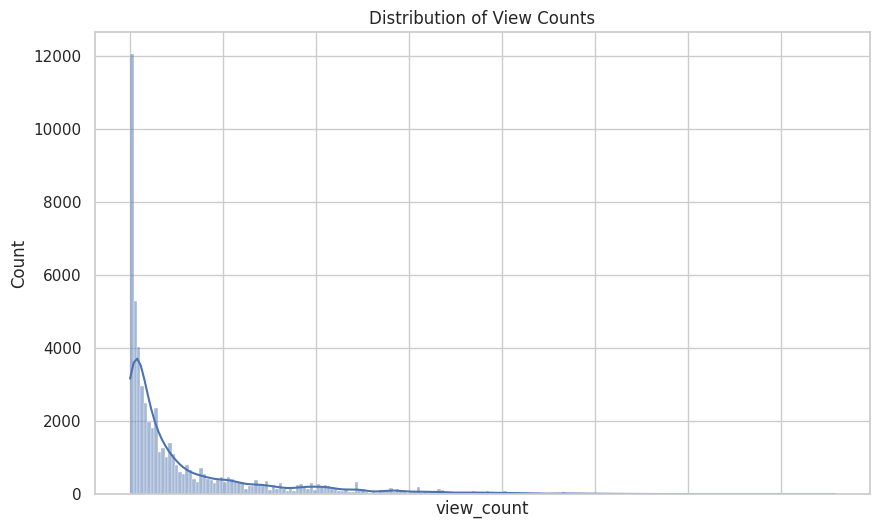

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['view_count'], kde=True)
plt.title('Distribution of View Counts')
plt.tick_params(axis='x', labelbottom=False)
plt.show()

Look for common words in 'title'

In [ ]:
from collections import Counter
import re

words = Counter(" ".join(data['title']).split()).most_common(10)
print("\nMost Common Words in Titles:\n", words)


Most Common Words in Titles:
 [('|', 20230), ('#shorts', 7196), ('-', 7093), ('a', 4809), ('The', 4790), ('the', 3911), ('I', 3776), ('to', 3605), ('of', 3593), ('A', 3435)]


---

## Conclusion of Exploratory Data Analysis

The exploratory data analysis has provided us with valuable insights into the YouTube trending videos dataset. Key takeaways include:

1. **Data Type Discrepancies:** We observed that all columns were initially read as objects (strings). For more accurate analysis, particularly for modeling, we converted numerical columns like `view_count`, `like_count`, and `comment_count` to numeric types and date-related columns to datetime objects.

2. **Skewed Distribution:** The distribution of view counts is highly right-skewed, indicating that a small number of videos have significantly higher views compared to the majority.

3. **Common Title Words:** The textual analysis of video titles revealed common words and symbols. However, many of these are general terms or punctuation that do not provide much informational value. Future analysis can be refined by excluding common stopwords and focusing on more descriptive terms.

4. **Missing Data:** We found a minimal amount of missing data in some columns, which will require careful handling during the data preprocessing phase to ensure our model receives the most accurate information possible.

5. **Variable Relationships:** Preliminary correlation analysis and descriptive statistics have begun to shed light on the relationships between variables. However, further statistical tests and more sophisticated visualizations might be needed to uncover deeper insights.

As we conclude the EDA phase, we have established a solid understanding of the dataset's characteristics, which will guide our data preprocessing and feature engineering.

# Data Preprocessing

##Import the necessary libraries.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

## Handling missing values

In [ ]:
imputer = SimpleImputer(strategy='mean')
data['view_count'] = imputer.fit_transform(data['view_count'].values.reshape(-1, 1))

## Outlier detection and handling using IQR

In [ ]:
Q1 = data['view_count'].quantile(0.25)
Q3 = data['view_count'].quantile(0.75)
IQR = Q3 - Q1
data = data.query('(@Q1 - 1.5 * @IQR) <= view_count <= (@Q3 + 1.5 * @IQR)')

## Removing non-English videos

In [ ]:
data = data[data["langauge"].astype('string').str.contains('en')]

## Train-test split

In [ ]:
# Define a threshold
# Vids with over 1M views are considered trending
view_count_threshold = 1000000

# Create a new binary column where videos above the threshold are considered trending
data['is_trending'] = (data['view_count'] >= view_count_threshold).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('is_trending', axis=1),
    data['is_trending'],
    test_size=0.2,
    random_state=42
)

## Constructing the dataframes and running more tests
Source: https://csci4050u.science.ontariotechu.ca/part-5/5-lstm.html

In [ ]:
# Testing (validation)
data_test = X_test[['title', 'video_tags']].copy()
data_test['isTrending'] = y_test

# We will use the data2 dataframe to try to determine what titles are likely to make a video trend
import itertools
data2 = X_train[['title', 'video_tags']].copy()
data2['isTrending'] = y_train
data2



,title,video_tags,isTrending
30034,She was dying to get his number 😫 part 1 @will...,"masface, masface6, masface6.com, phoenix, moto...",1
126139,"जाजरकोट पुग्दा यस्तो-बा चेका हरु मिडियामा,आखै ...","umanga tv, umanga talk",0
102160,MAKONDA KULALA KWA HAYATI MAGUFULI KWA HESHIMA...,,0
141627,Israeli Police release video showing gunfire b...,"Israeli Police release video showing gunfire, ...",1
184329,That's gonna be a lawsuit 🫣 part 1 @Ty_on_Two,"masface, masface6, masface6.com, phoenix, moto...",1
...,...,...,...
46995,Bachke Bachke (Full Video) Karan Aujla I Ikky ...,,1
173503,I Melted Every Halloween Candy Together,"safiya nygaard, safiya and tyler, tyler willia...",0
149535,I Stayed in Luxury Tiny Homes,"Ryan, Trahan, I stayed in luxury tiny homes, l...",1
3897,I bought the most FUTURISTIC Tech in the World,"tech, futuristic, gadgets, invisible, transpar...",1


In [ ]:
# You can see that the data2 dataframe has the isTrending value = 1 for any video where the views are above our previously set threshold (view_count_threshold)
data_preview = X_train[['title', 'video_tags', 'view_count']].copy()
data_preview['isTrending'] = y_train
data_preview

,title,video_tags,view_count,isTrending
30034,She was dying to get his number 😫 part 1 @will...,"masface, masface6, masface6.com, phoenix, moto...",33689203.0,1
126139,"जाजरकोट पुग्दा यस्तो-बा चेका हरु मिडियामा,आखै ...","umanga tv, umanga talk",192715.0,0
102160,MAKONDA KULALA KWA HAYATI MAGUFULI KWA HESHIMA...,,20140.0,0
141627,Israeli Police release video showing gunfire b...,"Israeli Police release video showing gunfire, ...",15905341.0,1
184329,That's gonna be a lawsuit 🫣 part 1 @Ty_on_Two,"masface, masface6, masface6.com, phoenix, moto...",17571336.0,1
...,...,...,...,...
46995,Bachke Bachke (Full Video) Karan Aujla I Ikky ...,,10770778.0,1
173503,I Melted Every Halloween Candy Together,"safiya nygaard, safiya and tyler, tyler willia...",963953.0,0
149535,I Stayed in Luxury Tiny Homes,"Ryan, Trahan, I stayed in luxury tiny homes, l...",5808698.0,1
3897,I bought the most FUTURISTIC Tech in the World,"tech, futuristic, gadgets, invisible, transpar...",5599610.0,1


In [ ]:
# For reference: the amount of videos above our threshold (True) in our training data
print("The current view threshold we are using is", view_count_threshold, "views.")
print("Videos above", view_count_threshold, "views:")
print((data_preview['view_count'] > view_count_threshold).value_counts())

The current view threshold we are using is 1000000 views.
Videos above 1000000 views:
True     31644
False    10050
Name: view_count, dtype: int64


In [ ]:
import torchtext.data
from torchtext.vocab import build_vocab_from_iterator
from tqdm.notebook import tqdm

tokenizer = torchtext.data.get_tokenizer('basic_english')

def iterate_tokens(df, category):
    for cate in tqdm(df[category]):
        yield tokenizer(cate)


df = data2

# Making a vocab for titles
vocab_titles = build_vocab_from_iterator(
    iterate_tokens(df, 'title'),
    min_freq=1,
    specials=['<unk>', '<s>', '<eos>'])

vocab_titles.set_default_index(0)

# Making a vocab for descriptions
vocab_desc = build_vocab_from_iterator(
    iterate_tokens(df, 'video_tags'),
    min_freq=1,
    specials=['<unk>', '<s>', '<eos>'])

vocab_desc.set_default_index(0)

print("Length of title vocab:", len(vocab_titles))
print("Length of video tags vocab:", len(vocab_desc))

  0%|          | 0/41694 [00:00<?, ?it/s]

  0%|          | 0/41694 [00:00<?, ?it/s]

Length of title vocab: 11936
Length of video tags vocab: 18979


In [ ]:
#First 30 tokens in our vocab (titles)
print("First 30 tokens (titles):", vocab_titles.lookup_tokens([0,1,2,3,4,5,6,7,8,9,10,11,12,13,
                     14,15,16,17,18,19,20,21,22,23,24,
                     25,26,27,28,29]))

#First 30 tokens in our vocab (descriptions)
print("First 30 tokens (video tags):", vocab_desc.lookup_tokens([0,1,2,3,4,5,6,7,8,9,10,11,12,13,
                     14,15,16,17,18,19,20,21,22,23,24,
                     25,26,27,28,29]))

First 30 tokens (titles): ['<unk>', '<s>', '<eos>', '|', 'the', '!', '.', 'a', '(', ')', '-', ',', '#shorts', "'", 'highlights', 'in', 'to', 'of', 'vs', '?', 'i', '2', 'you', '2023', 'official', 'with', 'and', 'part', '1', 'is']
First 30 tokens (video tags): ['<unk>', '<s>', '<eos>', ',', 'the', 'highlights', 'alan', 'funny', 'new', 'shorts', '2023', 'video', 'news', 'chelsea', 'chikin', 'chow', 'football', 'movie', 'music', 'movies', 'league', 'and', 'game', 'man', 'skibidi', 'of', 'vs', 'fc', 'ngannou', 'animation']


In [ ]:
# We can look up the index of specific keys/words
print("Lookup (example - titles):", vocab_titles.lookup_indices(['the', '?', 'video', 'set', 'fortnite', 'referee', 'veryunlikelywordtobeinavocab']))
print("Lookup (example - video tags):", vocab_desc.lookup_indices(['the', '?', 'video', 'set', 'fortnite', 'referee', 'veryunlikelywordtobeinavocab']))

Lookup (example - titles): [4, 19, 32, 1204, 93, 1603, 0]
Lookup (example - video tags): [4, 904, 11, 4081, 67, 15742, 0]


### Dataloaders
Source (Lecture): https://csci4050u.science.ontariotechu.ca/part-5/5-lstm.html

In [ ]:
import torch
from torch.utils.data import (
    TensorDataset,
    DataLoader,
    random_split,
)
from torch.nn.utils.rnn import pad_sequence

# Training
sequences_train_title = [
    torch.tensor(vocab_titles.lookup_indices(tokenizer(cate), ), dtype=torch.int64)\
    for cate in df['title']
]

sequences_train_desc = [
    torch.tensor(vocab_desc.lookup_indices(tokenizer(cate), ), dtype=torch.int64)\
    for cate in df['video_tags']
]


padded_sequences_train_title = pad_sequence(sequences_train_title, batch_first=True)[:, :250]
padded_sequences_train_desc = pad_sequence(sequences_train_desc, batch_first=True)[:, :250]
sentiments_train = torch.tensor(df['isTrending'].values, dtype=torch.float32)

# Testing (validation)
sequences_test_title = [
    torch.tensor(vocab_titles.lookup_indices(tokenizer(cate), ), dtype=torch.int64)\
    for cate in data_test['title']
]

sequences_test_desc = [
    torch.tensor(vocab_desc.lookup_indices(tokenizer(cate), ), dtype=torch.int64)\
    for cate in data_test['video_tags']
]

padded_sequences_test_title = pad_sequence(sequences_test_title, batch_first=True)[:, :250]
padded_sequences_test_desc = pad_sequence(sequences_test_title, batch_first=True)[:, :250]
sentiments_test = torch.tensor(data_test['isTrending'].values, dtype=torch.float32)



dataset = TensorDataset(torch.cat([padded_sequences_train_title, padded_sequences_train_desc], dim=1), sentiments_train)
dataset_testing = TensorDataset(torch.cat([padded_sequences_test_title, padded_sequences_test_desc], dim=1), sentiments_test)

batch_size = 32
train_dataloader = DataLoader(dataset, shuffle=True, batch_size=batch_size)
val_dataloader = DataLoader(dataset_testing, shuffle=True, batch_size=batch_size)

In [ ]:
padded_sequences_train_title

tensor([[ 161,   59,  590,  ...,    0,    0,    0],
        [8088, 8096, 8104,  ...,    0,    0,    0],
        [1232, 5269, 1162,  ...,    0,    0,    0],
        ...,
        [  20,  958,   15,  ...,    0,    0,    0],
        [  20,  478,    4,  ...,    0,    0,    0],
        [ 211,  144,  164,  ...,    0,    0,    0]])

In [ ]:
padded_sequences_train_desc

tensor([[  758,     3,   332,  ...,     0,     0,     0],
        [10820,    39,     3,  ...,     0,     0,     0],
        [    0,     0,     0,  ...,     0,     0,     0],
        ...,
        [  460,     3,  1911,  ...,     0,     0,     0],
        [  418,     3,  2159,  ...,     0,     0,     0],
        [  115,    74,     3,  ...,     0,     0,     0]])

In [ ]:
sentiments_train

tensor([1., 0., 0.,  ..., 1., 1., 1.])

## End-to-end sequence classifier

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.utils.rnn import pad_sequence
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data import get_tokenizer
from torchmetrics import Accuracy
from sklearn.model_selection import train_test_split



# End-to-end Sequence Classifier
class MySequenceClassifier(nn.Module):
    def __init__(self, vocab_size, dim_emb, dim_state):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, dim_emb)
        self.lstm = nn.LSTM(input_size=dim_emb, hidden_size=dim_state, num_layers=1, batch_first=True)
        self.output = nn.Linear(dim_state, 1)
        self.accuracy = Accuracy(task='binary')

    def forward(self, seq_batch):
        emb = self.embedding(seq_batch)
        _, (state, _) = self.lstm(emb)
        output = self.output(state[-1])
        return output


model = MySequenceClassifier(vocab_size=(len(vocab_titles) + len(vocab_desc)), dim_emb=32, dim_state=64)

## Training and Validation

In [ ]:
# Training
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()  # Binary Cross Entropy with Logits Loss
epochs = 18 # Adjust the number of epochs as needed
graph_y = np.empty(epochs)

for epoch in range(epochs):
    model.train()
    for inputs, targets in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets.squeeze())  # Squeeze the output to match the target shape
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        for inputs, targets in val_dataloader:
            outputs = model(inputs)
            predictions = torch.sigmoid(outputs.squeeze()) >= 0.5  # Convert to binary predictions
            total_correct += (predictions == targets).sum().item()
            total_samples += targets.size(0)

        accuracy = total_correct / total_samples
        graph_y[epoch] = accuracy
        print(f'Epoch {epoch + 1}, Validation Accuracy: {accuracy}, Correct amount:', total_correct, "/", total_samples)

Epoch 1, Validation Accuracy: 0.7603607060629317, Correct amount: 7926 / 10424
Epoch 2, Validation Accuracy: 0.7603607060629317, Correct amount: 7926 / 10424
Epoch 3, Validation Accuracy: 0.7598810437452034, Correct amount: 7921 / 10424
Epoch 4, Validation Accuracy: 0.7598810437452034, Correct amount: 7921 / 10424
Epoch 5, Validation Accuracy: 0.7598810437452034, Correct amount: 7921 / 10424
Epoch 6, Validation Accuracy: 0.7598810437452034, Correct amount: 7921 / 10424
Epoch 7, Validation Accuracy: 0.7392555640828856, Correct amount: 7706 / 10424
Epoch 8, Validation Accuracy: 0.6858211818879509, Correct amount: 7149 / 10424
Epoch 9, Validation Accuracy: 0.7395433614735226, Correct amount: 7709 / 10424
Epoch 10, Validation Accuracy: 0.7526861089792786, Correct amount: 7846 / 10424
Epoch 11, Validation Accuracy: 0.7843438219493477, Correct amount: 8176 / 10424
Epoch 12, Validation Accuracy: 0.8045855717574827, Correct amount: 8387 / 10424
Epoch 13, Validation Accuracy: 0.8147544128933231

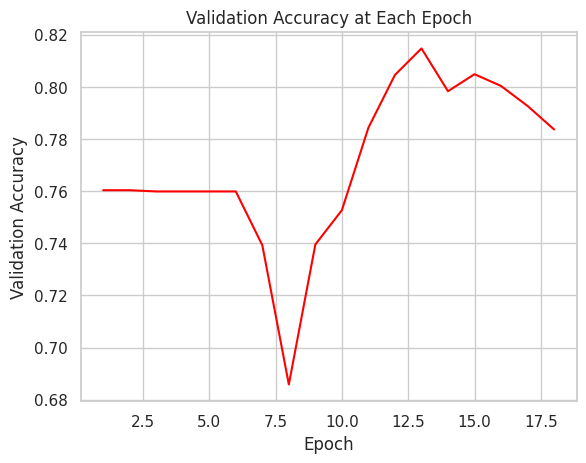

In [ ]:
import matplotlib.pyplot as plt
graph_x = np.arange(1,epochs+1)
plt.title("Validation Accuracy at Each Epoch")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.plot(graph_x, graph_y, color = "red")

## Testing

In [ ]:
import torch
from torch.nn.utils.rnn import pad_sequence
from torchtext.data import get_tokenizer
from torchtext.vocab import Vocab
from torch import nn

def preprocess_title(title, desc, tokenizer, vocab_t, vocab_d, max_length=250):
    # Tokenize the title / desc
    tokens_title = tokenizer(title)
    tokens_desc = tokenizer(desc)

    # Convert tokens to indices using the vocabulary
    indices_title = [vocab_t[token] for token in tokens_title]
    indices_desc = [vocab_d[token] for token in tokens_desc]

    # Pad the sequence to the desired length
    padded_sequence_title = pad_sequence([torch.tensor(indices_title)], batch_first=True, padding_value=vocab_t['<pad>'])[:, :max_length]
    padded_sequence_desc = pad_sequence([torch.tensor(indices_desc)], batch_first=True, padding_value=vocab_d['<pad>'])[:, :max_length]

    return torch.cat([padded_sequence_title, padded_sequence_desc], dim=1)

def predict_trending(model, preprocessed_info):
    # Ensure the model is in evaluation mode
    model.eval()

    # Forward pass through the model
    with torch.no_grad():
        output = model(preprocessed_info)

    # Apply a sigmoid function to obtain probabilities
    probabilities = torch.sigmoid(output.squeeze())
    print(probabilities)

    # Apply a threshold (e.g., 0.5) to determine the predicted class
    predicted_class = (probabilities >= 0.5).item()

    return predicted_class, probabilities.item()

# Example usage:
new_title = "Test Title" # Enter a title
new_tags = "Test, Tags" # Enter tags
preprocessed_info = preprocess_title(new_title, new_tags, tokenizer, vocab_titles, vocab_desc)
predicted_class, probability = predict_trending(model, preprocessed_info)

print(f"Predicted Class: {predicted_class}")
print(f"Probability: {probability}")

tensor(0.8276)
Predicted Class: True
Probability: 0.8276371359825134
